In [1]:
import pandas as pd

In [2]:
# Loading the dataset
diabetic = pd.read_csv('diabetic_data.csv')
adm = pd.read_excel('admission_details.xlsx')
pat = pd.read_excel('Paitent_details.xlsx')
lab = pd.read_excel('Lab-session.xlsx')
diag = pd.read_excel('Diagnosis_session.xlsx')

## MERGING

In [3]:
# Merging diabetic details and patient details
df1 = pd.merge(diabetic,pat,on = 'encounter_id')

In [4]:
df1.shape

(101766, 34)

In [5]:
# Merging above dataframe and lab session
df2 = pd.merge(df1,lab,on = 'encounter_id')

In [6]:
df2.shape

(101766, 40)

In [7]:
# Dropping duplicates in diagnosis session dataset
#diag_dup = diag.drop_duplicates(subset='patient_nbr',keep='first')

In [8]:
#diag_dup.shape

In [9]:
# Dropping duplicates in admission details dataset
#adm_dup = adm.drop_duplicates(subset='patient_nbr',keep='first')

In [10]:
# Merging diagnosis and admission table after removing duplicates
df3 = pd.merge(diag,adm,on = 'patient_nbr',how='inner')

In [11]:
df3.shape

(229892, 11)

In [12]:
# Merging above 2 dataframes
df4 = pd.merge(df2,df3,on = 'patient_nbr',how='left')

In [13]:
df4.shape

(1126248, 50)

In [14]:
df = df4

In [15]:
df.shape

(1126248, 50)

## NULL VALUES

In [16]:
df.isnull().sum()

encounter_id                0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126248 entries, 0 to 1126247
Data columns (total 50 columns):
encounter_id                1126248 non-null int64
max_glu_serum               1126248 non-null object
A1Cresult                   1126248 non-null object
metformin                   1126248 non-null object
repaglinide                 1126248 non-null object
nateglinide                 1126248 non-null object
chlorpropamide              1126248 non-null object
glimepiride                 1126248 non-null object
acetohexamide               1126248 non-null object
glipizide                   1126248 non-null object
glyburide                   1126248 non-null object
tolbutamide                 1126248 non-null object
pioglitazone                1126248 non-null object
rosiglitazone               1126248 non-null object
acarbose                    1126248 non-null object
miglitol                    1126248 non-null object
troglitazone                1126248 non-null object
tola

## DEALING WITH ? VALUES

In [18]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


### weight

In [19]:
df[df.weight=='?']['weight'].value_counts()

?    1119684
Name: weight, dtype: int64

majority values are ? hence dropping weight column.

In [20]:
df.drop('weight',axis = 1,inplace=True)

### diag_1

In [21]:
df[df.diag_1=='?']['diag_1'].value_counts()

?    128
Name: diag_1, dtype: int64

In [22]:
df.diag_1.mode()

0    428
dtype: object

In [23]:
df['diag_1'].replace('?','428',inplace=True)

In [24]:
df[df.diag_1=='?']['diag_1'].value_counts()

Series([], Name: diag_1, dtype: int64)

### diag 2

In [25]:
df[df.diag_2=='?']['diag_2'].value_counts()

?    5400
Name: diag_2, dtype: int64

In [26]:
df.diag_2.mode()

0    276
dtype: object

In [27]:
df.diag_2.replace('?','276',inplace=True)

In [28]:
df[df.diag_2=='?']['diag_2'].value_counts()

Series([], Name: diag_2, dtype: int64)

### diag 3

In [29]:
df[df.diag_3=='?']['diag_3'].value_counts()

?    21093
Name: diag_3, dtype: int64

In [30]:
df.diag_3.mode()

0    250
dtype: object

In [31]:
df.diag_3.replace('?','250',inplace=True)

In [32]:
df[df.diag_3=='?']['diag_3'].value_counts()

Series([], Name: diag_3, dtype: int64)

### payer_code

In [33]:
df[df.payer_code=='?']['payer_code'].value_counts()

?    280096
Name: payer_code, dtype: int64

In [34]:
df.payer_code.mode()

0    MC
dtype: object

In [35]:
df.payer_code.replace('?','MC',inplace=True)

In [36]:
df[df.payer_code=='?']['payer_code'].value_counts()

Series([], Name: payer_code, dtype: int64)

### medical_speciality

In [37]:
df[df.medical_specialty=='?']['medical_specialty'].value_counts()

?    538937
Name: medical_specialty, dtype: int64

#### since maximum values in medical_specialty are ? we can drop this column

In [38]:
df.drop('medical_specialty',axis=1,inplace=True)

## UNIVARIATE ANALYSIS

In [39]:
df.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_nbr', 'race', 'gender', 'age', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code'],
      dtype='object')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

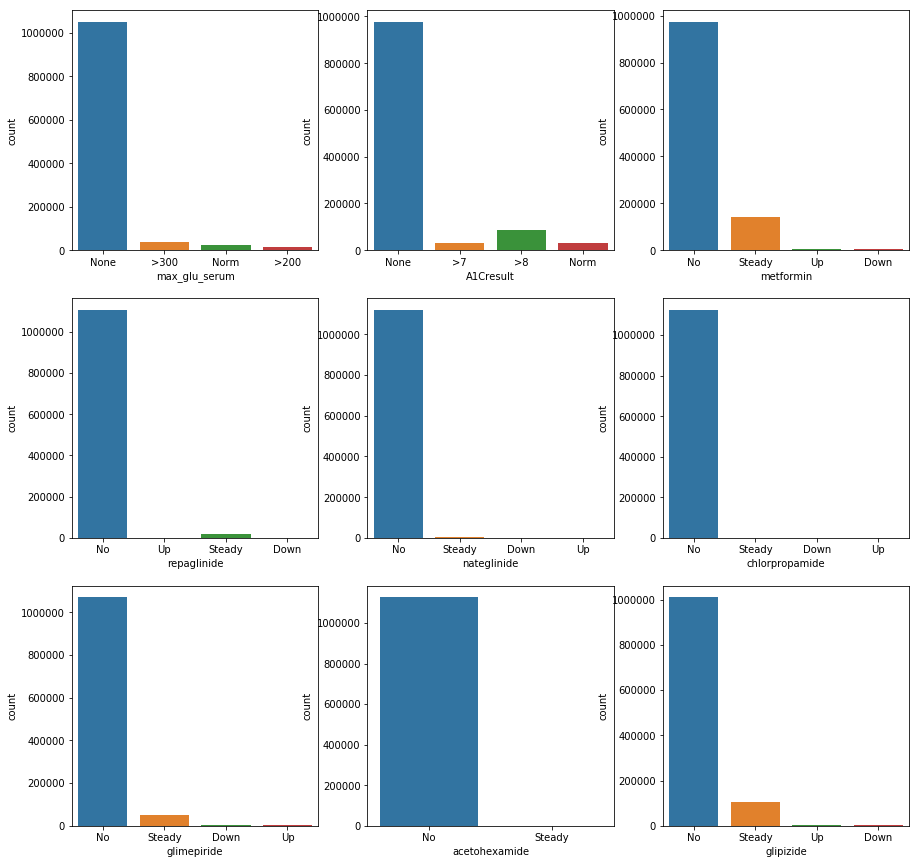

In [41]:
plt.figure(figsize=[15,15])
plt.subplot(331)
sns.countplot(df.max_glu_serum)
plt.subplot(332)
sns.countplot(df.A1Cresult)
plt.subplot(333)
sns.countplot(df.metformin)
plt.subplot(334)
sns.countplot(df.repaglinide)
plt.subplot(335)
sns.countplot(df.nateglinide)
plt.subplot(336)
sns.countplot(df.chlorpropamide)
plt.subplot(337)
sns.countplot(df.glimepiride)
plt.subplot(338)
sns.countplot(df.acetohexamide)
plt.subplot(339)
sns.countplot(df.glipizide)

#### Most records are of category 'none' and 'No'

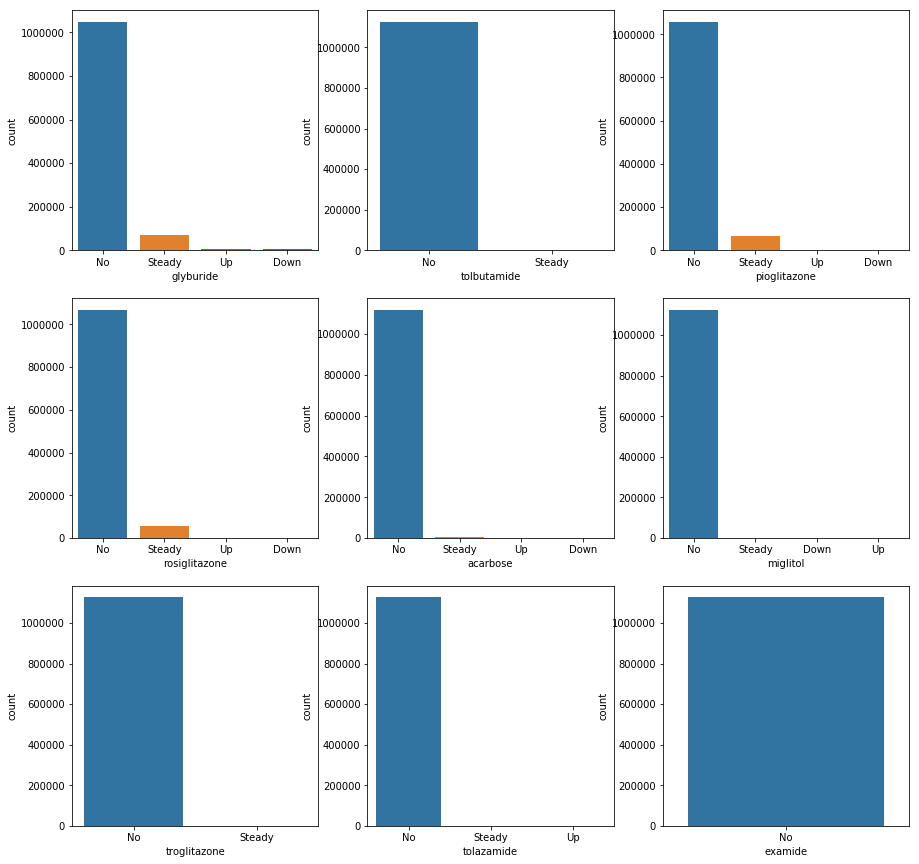

In [42]:
plt.figure(figsize=[15,15])
plt.subplot(331)
sns.countplot(df.glyburide)
plt.subplot(332)
sns.countplot(df.tolbutamide)
plt.subplot(333)
sns.countplot(df.pioglitazone)
plt.subplot(334)
sns.countplot(df.rosiglitazone)
plt.subplot(335)
sns.countplot(df.acarbose)
plt.subplot(336)
sns.countplot(df.miglitol)
plt.subplot(337)
sns.countplot(df.troglitazone)
plt.subplot(338)
sns.countplot(df.tolazamide)
plt.subplot(339)
sns.countplot(df.examide)

#### examide has no other values than 'No' hence dropping this column

In [43]:
df.drop('examide',axis=1,inplace=True)

In [44]:
df.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_nbr', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code'],
      dtype='object')

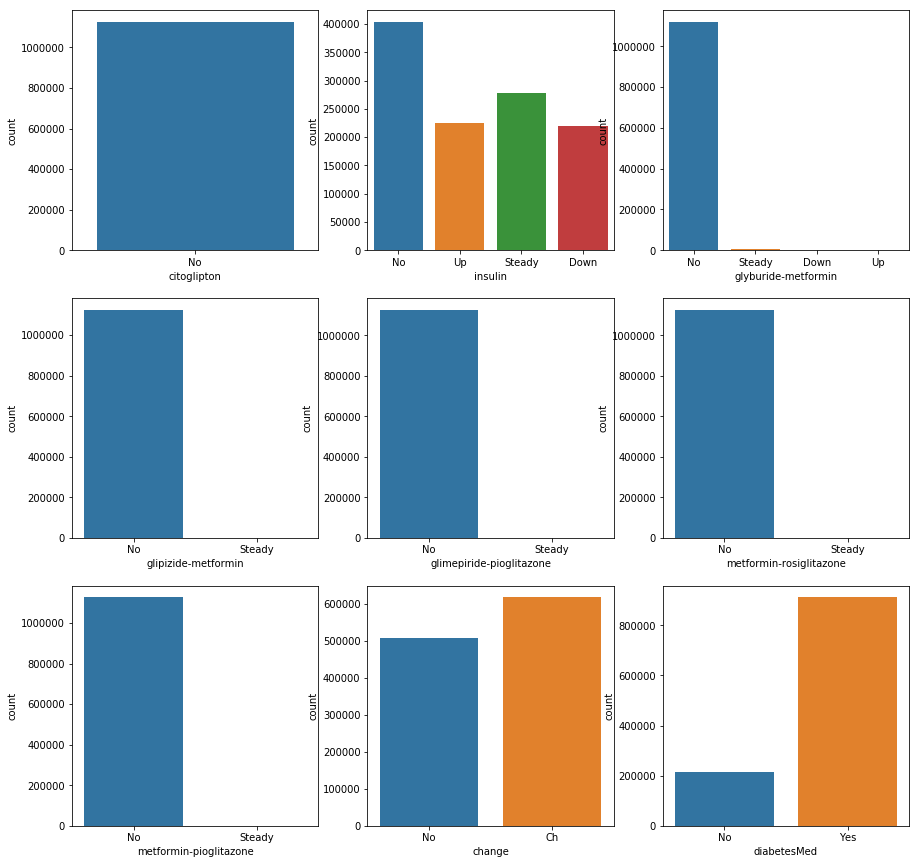

In [45]:
plt.figure(figsize=[15,15])
plt.subplot(331)
sns.countplot(df.citoglipton)
plt.subplot(332)
sns.countplot(df.insulin)
plt.subplot(333)
sns.countplot(df['glyburide-metformin'])
plt.subplot(334)
sns.countplot(df['glipizide-metformin'])
plt.subplot(335)
sns.countplot(df['glimepiride-pioglitazone'])
plt.subplot(336)
sns.countplot(df['metformin-rosiglitazone'])
plt.subplot(337)
sns.countplot(df['metformin-pioglitazone'])
plt.subplot(338)
sns.countplot(df.change)
plt.subplot(339)
sns.countplot(df.diabetesMed)

#### citoglipton has no other value than 'No' hence dropping this column

In [46]:
df.drop('citoglipton',axis=1,inplace=True)

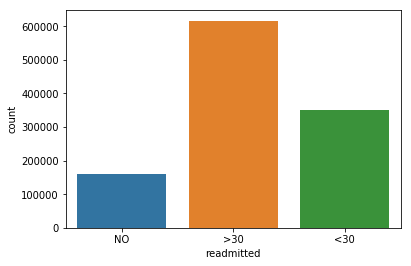

In [47]:
sns.countplot(df.readmitted)

In [48]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


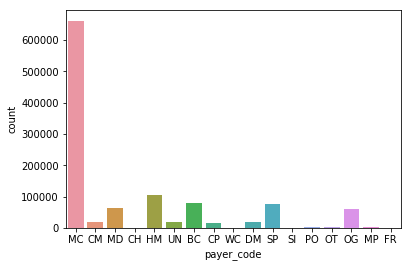

In [49]:
sns.countplot(df.payer_code)

In [50]:
df.gender.replace('Unknown/Invalid','Female',inplace=True)

In [51]:
df.race.replace('?',df.race.mode(),inplace=True)

### BIVARIATE 

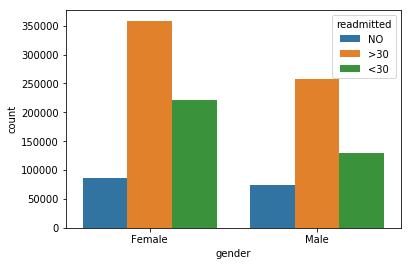

In [78]:
sns.countplot(df.gender,hue=df.readmitted)

#### More females were readmitted

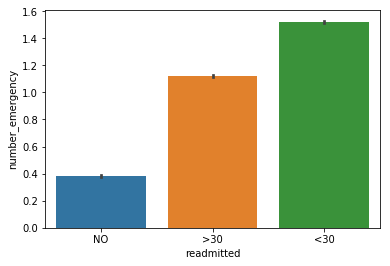

In [79]:
sns.barplot(df.readmitted,df.number_emergency)

#### number_emergency is directly related to readmission

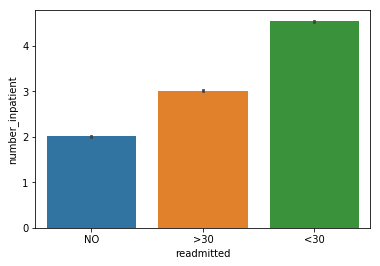

In [80]:
sns.barplot(df.readmitted,df.number_inpatient)

#### number_inpatient is related with readmitted

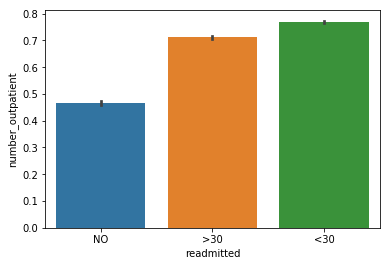

In [81]:
sns.barplot(df.readmitted,df.number_outpatient)

#### number_outpatient is also related with readmitted

In [52]:
df.readmitted.value_counts(True)

>30    0.547256
<30    0.311274
NO     0.141470
Name: readmitted, dtype: float64

## Model Building

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


### Dropping diag_1, diag_2, diag_3 since there are too many categorical values in these three fields and which is creating too many dummy values. 

In [55]:
df2 = df.drop(['diag_1','diag_2','diag_3'],axis=1)

In [56]:
X = df2.drop('readmitted',axis=1)
y=df2.readmitted

In [57]:
X_new = pd.get_dummies(X)

In [58]:
X_new.shape

(1126248, 129)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=100)

### RANDOM FOREST

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train,y_train)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
y_pred=rf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
accuracy_score(y_test,y_pred)

0.9658335183129856

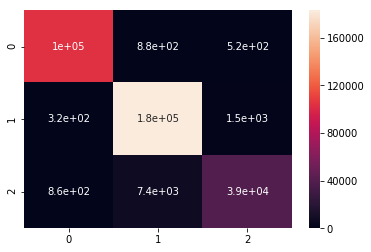

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### This shows that our model is classifying the given data decently.